<a href="https://colab.research.google.com/github/iasminqmoura/ia_2023/blob/main/Lista_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
entrada = np.array([1.0, 2.0, 3.0, 4.0])

pesos = np.array([0.5, 0.2, 0.8, 0.3])

def soma_ponderada(entrada, pesos):
    return np.sum(entrada * pesos)

def degrau(valor_soma):
    if valor_soma >= 0:
        return 1
    else:
        return 0

resultado_soma = soma_ponderada(entrada, pesos)

resultado_ativacao = degrau(resultado_soma)

print("Resultado da Soma Ponderada:", resultado_soma)
print("Resultado da Função de Ativação (Degrau):", resultado_ativacao)

Resultado da Soma Ponderada: 4.5
Resultado da Função de Ativação (Degrau): 1


In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

resultado_soma = soma_ponderada(entrada, pesos)

resultado_sigmoid = sigmoid(resultado_soma)

resultado_tanh = tanh(resultado_soma)

resultado_relu = relu(resultado_soma)

print("Resultado da Soma Ponderada:", resultado_soma)
print("Resultado da Função de Ativação Sigmoid:", resultado_sigmoid)
print("Resultado da Função de Ativação Tanh:", resultado_tanh)
print("Resultado da Função de Ativação ReLU:", resultado_relu)

Resultado da Soma Ponderada: 4.5
Resultado da Função de Ativação Sigmoid: 0.9890130573694068
Resultado da Função de Ativação Tanh: 0.9997532108480275
Resultado da Função de Ativação ReLU: 4.5


Saídas do Teste da Porta AND: [0, 0, 0, 1]


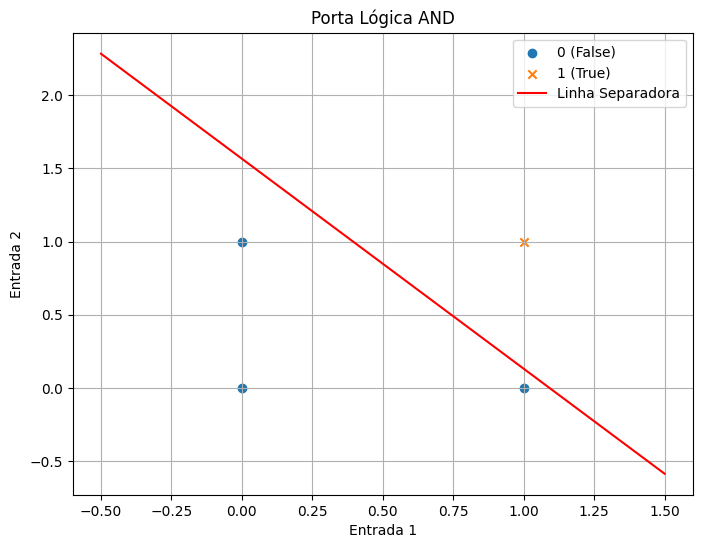

0.1

In [4]:
entradas_and = [(np.array([0, 0]), 0),
                (np.array([0, 1]), 0),
                (np.array([1, 0]), 0),
                (np.array([1, 1]), 1)]

taxa_aprendizado = 0.1
epocas = 1000

pesos_and = np.random.rand(3)

def treinar_perceptron(entradas, pesos, taxa_aprendizado, epocas, funcao_ativacao):
    erros = []
    for _ in range(epocas):
        erro_total = 0
        for entrada, target in entradas:
            entrada_bias = np.insert(entrada, 0, 1)
            resultado_soma = np.dot(entrada_bias, pesos)
            saida = funcao_ativacao(resultado_soma)
            erro = target - saida
            erro_total += erro
            pesos += taxa_aprendizado * erro * entrada_bias
        erros.append(erro_total)
    return pesos, erros

pesos_treinados_and, erros_and = treinar_perceptron(entradas_and, pesos_and, taxa_aprendizado, epocas, degrau)

def teste_perceptron(entradas, pesos, funcao_ativacao):
    saidas = []
    for entrada, _ in entradas:
        entrada_bias = np.insert(entrada, 0, 1)
        resultado_soma = np.dot(entrada_bias, pesos)
        saida = funcao_ativacao(resultado_soma)
        saidas.append(saida)
    return saidas

saida_teste_and = teste_perceptron(entradas_and, pesos_treinados_and, degrau)
print("Saídas do Teste da Porta AND:", saida_teste_and)

plt.figure(figsize=(8, 6))
plt.scatter([0, 0, 1], [0, 1, 0], marker='o', label='0 (False)')
plt.scatter(1, 1, marker='x', label='1 (True)')
plt.xlabel('Entrada 1')
plt.ylabel('Entrada 2')
x = np.linspace(-0.5, 1.5, 100)
y = (-pesos_treinados_and[1] / pesos_treinados_and[2]) * x - (pesos_treinados_and[0] / pesos_treinados_and[2])
plt.plot(x, y, 'r', label='Linha Separadora')
plt.title('Porta Lógica AND')
plt.legend()
plt.grid(True)
plt.show()
epocas
taxa_aprendizado

Saídas do Teste da Porta OR: [0, 1, 1, 1]


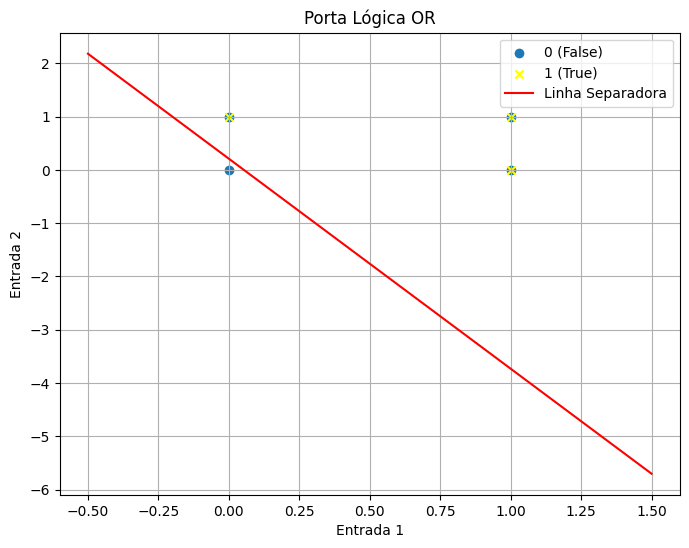

In [5]:
entradas_or = [(np.array([0, 0]), 0),
               (np.array([0, 1]), 1),
               (np.array([1, 0]), 1),
               (np.array([1, 1]), 1)]

pesos_or = np.random.rand(3)

pesos_treinados_or, erros_or = treinar_perceptron(entradas_or, pesos_or, taxa_aprendizado, epocas, degrau)

saida_teste_or = teste_perceptron(entradas_or, pesos_treinados_or, degrau)
print("Saídas do Teste da Porta OR:", saida_teste_or)

plt.figure(figsize=(8, 6))
plt.scatter([0, 1, 0, 1], [0, 0, 1, 1], marker='o', label='0 (False)')
plt.scatter([0, 1, 1], [1, 0, 1], marker='x', label='1 (True)', c='yellow')
plt.xlabel('Entrada 1')
plt.ylabel('Entrada 2')
x = np.linspace(-0.5, 1.5, 100)
y = (-pesos_treinados_or[1] / pesos_treinados_or[2]) * x - (pesos_treinados_or[0] / pesos_treinados_or[2])
plt.plot(x, y, 'r', label='Linha Separadora')
plt.title('Porta Lógica OR')
plt.legend()
plt.grid(True)
plt.show()